# Football Events
The dataset provides a granular view of 9,074 games, totaling 941,009 events from the biggest 5 European football (soccer) leagues: England, Spain, Germany, Italy, France from 2011/2012 season to 2016/2017 season as of 25.01.2017.

The dataset is organized in 2 files:
•	events.csv contains event data about each game. Text commentary was scraped from: bbc.com, espn.com and onefootball.com
•	ginf.csv - contains metadata and market odds about each game. odds were collected from oddsportal.com.

The aim of the project is to predict whether a goal will occur or not based on several events or conditions...which are:
•	Location of the ball on the field.
•	Bodypart that used to shot the ball.
•	Assist method that resulted a goal.
•	Whether if it was a Corner, Free kick , Open play..
•	Shot place



## Importing libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import  roc_auc_score, confusion_matrix, roc_curve,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,learning_curve,validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier



In [2]:
df = pd.read_csv("events.csv")
info = pd.read_csv('ginf.csv')

In [46]:
df.head(20)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,assist_method,situation,fast_break,country,date,ht,at,league,fthg,ftag
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,1,1.0,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
8,UFot0hit/,UFot0hit9,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1
9,UFot0hit/,UFot0hit10,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,0,NaN,0,germany,2011-08-05,Borussia Dortmund,Hamburg SV,D1,3,1


In [4]:
info.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN
6,M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,NaN,NaN,NaN,NaN
7,QuWqjrYa/,/soccer/france/ligue-1-2011-2012/ac-ajaccio-to...,True,2011-08-06,F1,2012,france,AC Ajaccio,Toulouse,0,2,2.80,3.10,3.05,NaN,NaN,NaN,NaN
8,UBZQ4smg/,/soccer/france/ligue-1-2011-2012/nice-lyon-UBZ...,True,2011-08-06,F1,2012,france,Nice,Lyon,1,3,4.50,3.55,2.00,NaN,NaN,NaN,NaN
9,Wn69eU5B/,/soccer/germany/bundesliga-2011-2012/koln-wolf...,True,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,3.00,3.80,2.54,NaN,NaN,NaN,NaN


## DataFrames merging
df and info will be merged in one DataFrame...

In [5]:
df = df.merge(info[['id_odsp', 'country', 'date','ht','at','league','fthg','ftag']], on='id_odsp', how='left')

## Exploratory data analysis

In [47]:
goals = df[df['is_goal'] == 1]
team_group = goals.groupby(['event_team'])['is_goal'].sum(
).reset_index().sort_values(by='is_goal', ascending=False)
player_group = goals.groupby(['event_team', 'player'])['is_goal'].sum(
).reset_index().sort_values(by='is_goal', ascending=False)

player_group

,event_team,player,is_goal
508,Barcelona,lionel messi,205
3529,Real Madrid,cristiano ronaldo,197
3341,Paris Saint-Germain,zlatan ibrahimovic,111
2594,Lyon,alexandre lacazette,88
3547,Real Madrid,karim benzema,85
...,...,...,...
769,Borussia Dortmund,georg niedermeier,1
767,Borussia Dortmund,felipe,1
2890,Marseille,romain danze,1
2891,Marseille,romaric,1


C:\Users\user\AppData\Local\Temp\ipykernel_25148\2185141396.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=team_group.iloc[:10], x='event_team',


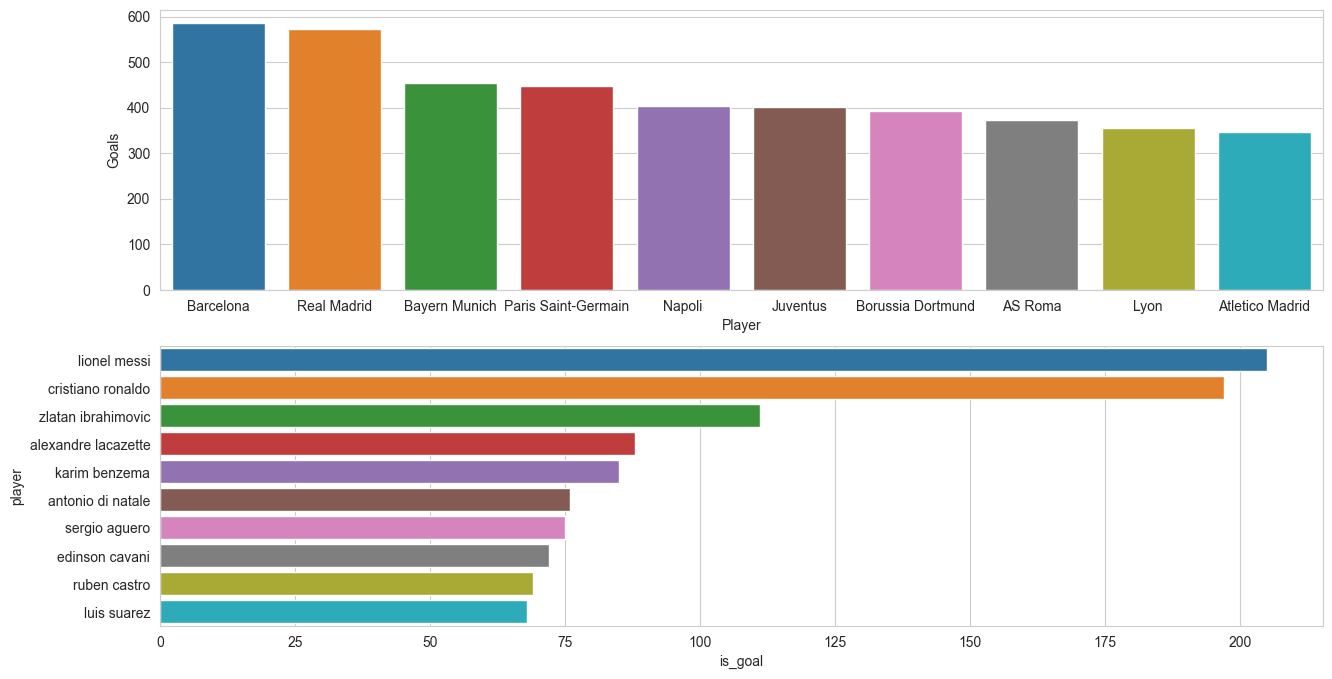

In [52]:
plt.rcParams["figure.figsize"] = (15, 8)
fig, ax = plt.subplots(2, 1)
sns.barplot(data=team_group.iloc[:10], x='event_team',
            y='is_goal', ax=ax[0], ci=None)
ax[0].set_ylabel('Goals')
ax[0].set_xlabel('Team')

sns.barplot(data=player_group.iloc[:10], x='is_goal',
            y='player', ax=ax[1])
# sns.barplot(data=player_group,x='player',y='is_goal',ax=ax[1])
ax[0].set_ylabel('Goals')
ax[0].set_xlabel('Player')
plt.show()

In [54]:
shot_places = {1:'Bit too high', 2:'Blocked', 3:'Bottom left corner', 4:'Bottom right corner', 5:'Centre of the goal', 6:'High and wide', 7:'Hits the bar', 8:'Misses to the left', 9:'Misses to the right', 10:'Too high', 11:'Top centre of the goal', 12:'Top left corner', 13:'Top right corner'}
goal_location = goals.groupby(['shot_place'])['is_goal'].count(
).reset_index().sort_values(by='is_goal', ascending=False)
goal_location['Percentage'] = round(
    goal_location['is_goal']/goal_location['is_goal'].sum() * 100, 2)
goal_location['shot_place'] = goal_location['shot_place'].map(shot_places)
goal_location

,shot_place,is_goal,Percentage
0,Bottom left corner,7212,31.67
1,Bottom right corner,6932,30.44
2,Centre of the goal,4446,19.53
4,Top right corner,2157,9.47
3,Top left corner,2023,8.88


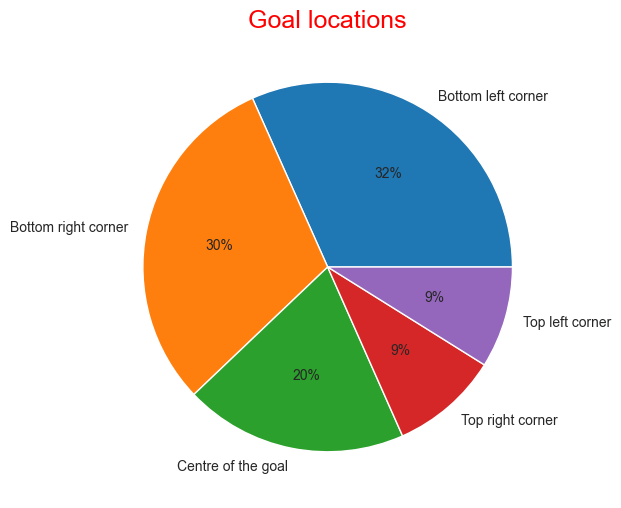

In [55]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.pie(goal_location['is_goal'], labels=goal_location['shot_place'],
        normalize=True, autopct='%.0f%%')
# sns.barplot(x=goal_location['shot_place'],y=goal_location['Percentage'])
plt.title('Goal locations', fontdict={'size': 18, 'color': 'r'})
plt.show()

In [106]:
locations = {1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', 4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', 7:'Difficult angle on the left', 8:'Difficult angle on the right', 9:'Left side of the box', 10:'Left side of the six yard box', 11:'Right side of the box', 12:'Right side of the six yard box', 13:'Very close range', 14:'Penalty spot', 15:'Outside the box', 16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards', 19:'Not recorded'}

shot_location = df.groupby(['location'])['is_goal'].sum().reset_index().sort_values(by='is_goal', ascending=False)

shot_location['location'] = shot_location['location'].map(locations)
shot_location.reset_index()

,index,location,is_goal
0,2,Centre of the box,10713
1,12,Very close range,3337
2,14,Outside the box,2555
3,13,Penalty spot,1989
4,18,Not recorded,1438
5,10,Right side of the box,1273
6,8,Left side of the box,1234
7,9,Left side of the six yard box,711
8,11,Right side of the six yard box,702
9,6,Difficult angle on the left,201


In [107]:
box=shot_location.iloc[[3,5,6,7,8]]
box

,location,is_goal
13,Penalty spot,1989
10,Right side of the box,1273
8,Left side of the box,1234
9,Left side of the six yard box,711
11,Right side of the six yard box,702


### Goal locations

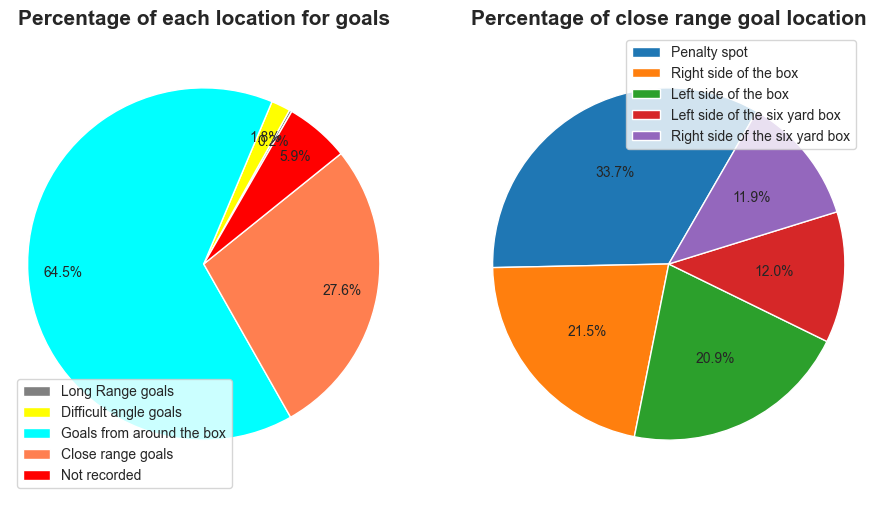

In [141]:
fig,ax = plt.subplots(1,2)


diff_angle_goals=sum(goals["location"]==6)+sum(goals["location"]==7)+sum(goals["location"]==8)
long_range_goals=sum(goals["location"]==16)+sum(goals["location"]==17)+sum(goals["location"]==18)
box_goals=sum(goals["location"]==3)+sum(goals["location"]==9)+sum(goals["location"]==11)+sum(goals["location"]==15)
close_range_goals=sum(goals["location"]==10)+sum(goals["location"]==12)+sum(goals["location"]==13,sum(goals["location"]==14))
not_recorded=sum(goals["location"]==19)

labels=["Long Range goals","Difficult angle goals","Goals from around the box","Close range goals","Not recorded"]
sizes=[long_range_goals,diff_angle_goals,box_goals,close_range_goals,not_recorded]
colors=["gray","yellow","aqua","coral","red"]

ax[0].pie(sizes,colors=colors,autopct='%1.1f%%',startangle=60,pctdistance=0.8)
ax[0].legend(labels)
ax[0].axis('equal')
ax[0].set_title("Percentage of each location for goals",fontsize=15,fontweight="bold")

ax[1].pie(box['is_goal'],
               normalize=True,autopct='%1.1f%%',startangle=60)
ax[1].set_title("Percentage of close range goal location",fontsize=15,fontweight="bold")
ax[1].legend(box['location'])
ax[1].axis('equal')

fig.set_size_inches(11,6)
plt.show()



The pie graphs displays:

- The majority of goals are attempted from around the box (64.5%) and close range (19.4%).

- From the close range goals we can see that the penalty spot has the highest percentage(33.7%).

### Goals against time

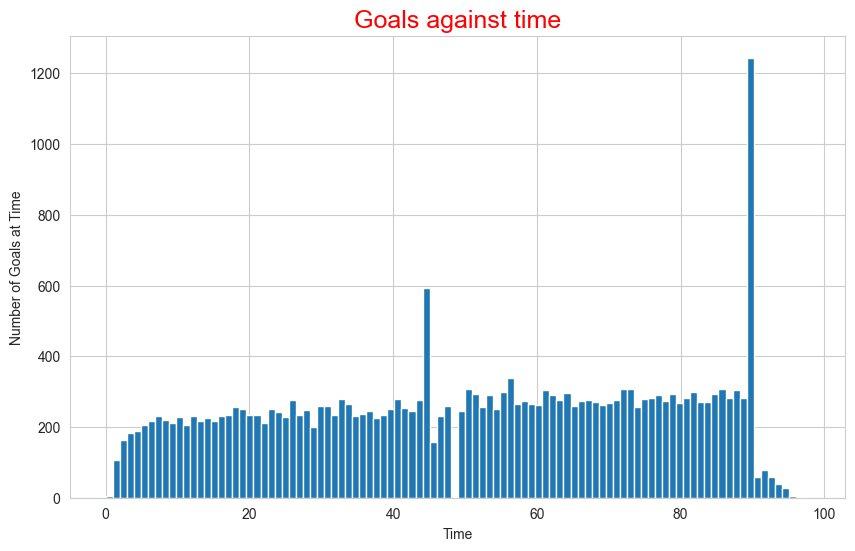

In [66]:
plt.hist(goals['time'], 100)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.title("Goals against time", fontdict={'size': 18, 'color': 'r'})
plt.show()

The plot above shows:
-  Most goals are scored around the **Half-Time (45mins + extra time)** and around **Full-Time (90mins + extra time)**


### Analysing Home/Away goals

Text(0.5, 1.0, 'Number of goals (by home/away side) against Time during match')

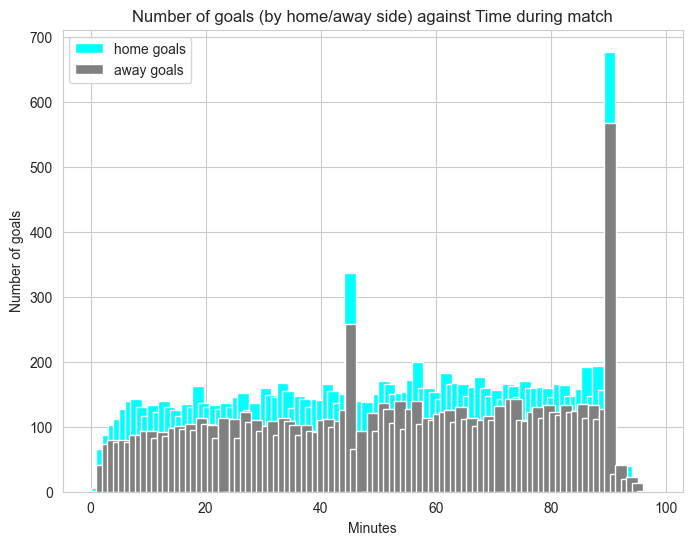

In [67]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals[goals["side"]==1]["time"],width=2,bins=100,color="cyan",label="home goals")
plt.hist(goals[goals["side"]==2]["time"],width=2,bins=100,color="grey",label="away goals")
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by home/away side) against Time during match")

The plot above shows:
-  For every minute, most of the goals scored are by the **home side**

This supports the general notion that the home side has a statistical advantage.

### Analysing HOW and WHERE goals are scored

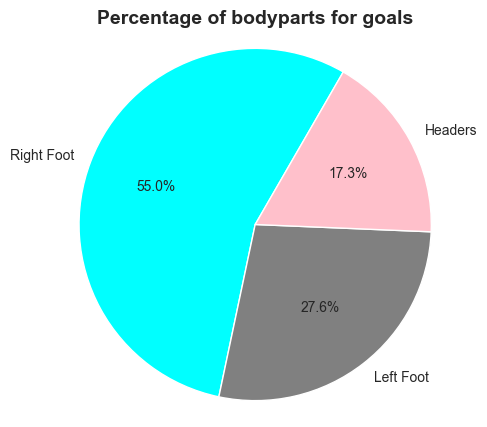

In [70]:

labels=["Right Foot","Left Foot","Headers"]
sizes=[goals[goals["bodypart"]==1].shape[0],goals[goals["bodypart"]==2].shape[0],goals[goals["bodypart"]==3].shape[0]]
colors=["cyan","grey","pink"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=60)
plt.axis('equal')
plt.title("Percentage of bodyparts for goals",fontsize=14,fontweight="bold")
fig=plt.gcf()
fig.set_size_inches(5,5)


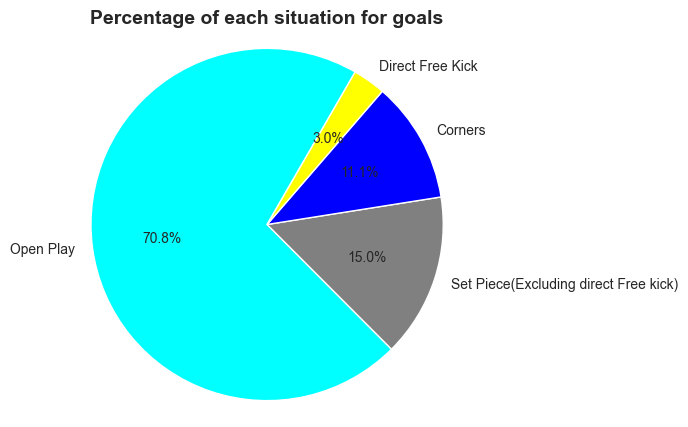

In [72]:
labels=["Open Play", "Set Piece(Excluding direct Free kick)","Corners","Direct Free Kick"]
sizes=[goals[goals["situation"]==1].shape[0],goals[goals["situation"]==2].shape[0],goals[goals["situation"]==3].shape[0],goals[goals["situation"]==4].shape[0]]
colors=["cyan","grey","blue","yellow"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=60)
plt.axis('equal')
plt.title("Percentage of each situation for goals",fontsize=14,fontweight="bold")
fig=plt.gcf()
fig.set_size_inches(5,5)

-  The plots depict:

Approximately 70.8% of goals are scored in **open play**.

Text(0.5, 1.0, 'Number of Red cards (Home/Away)')

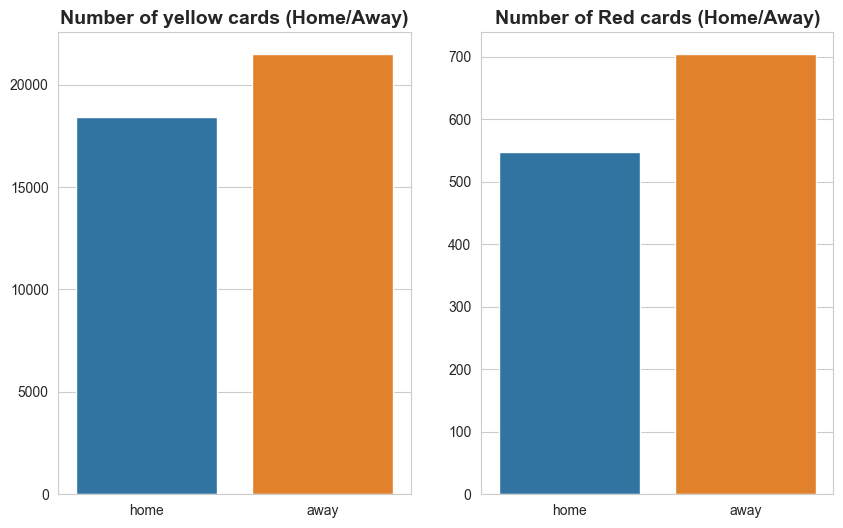

In [103]:
fig, ax = plt.subplots(1, 2)
#yellow cards
yel_card = df[df["event_type"]==4]
yel_home=yel_card[yel_card["side"]==1].shape[0]
yel_away=yel_card[yel_card["side"]==2].shape[0]

yel_combi =pd.DataFrame({"home":yel_home,"away":yel_away},index=["Yellow cards"])

plt.title("Number of yellow cards (Home/Away)",fontsize=14,fontweight="bold")
sns.barplot(data=yel_combi, ax=ax[0])
ax[0].set_title("Number of yellow cards (Home/Away)",fontsize=14,fontweight="bold")


# Red cards
red=df[df["event_type"]==6]
sec_yellow=df[df["event_type"]==5]
reds=[sec_yellow,red]
red_cards=pd.concat(reds)
red_cards.event_type.unique()
red_home=red_cards[red_cards["side"]==1].shape[0]
red_away=red_cards[red_cards["side"]==2].shape[0]

red_combi=pd.DataFrame({"home":red_home,"away":red_away},index=["Red cards"])
sns.barplot(data=red_combi, ax=ax[1])
ax[1].set_title("Number of Red cards (Home/Away)",fontsize=14,fontweight="bold")



The away team has received more yellow & red cards than the home team.


## Data Cleaning

In [6]:
df.isna().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
country               0
date                  0
ht                    0
at                    0
league                0
fthg                  0
ftag                  0
dtype: int64

In [7]:
df_cleaned = df[['location', 'bodypart','assist_method','situation','time','player','side','shot_place','is_goal','event_type']].copy()
df_cleaned.dropna(how='all') # this will remove rows will all null values
df_cleaned.dropna(subset=['player', 'shot_place'], inplace=True)

In [8]:
df_cleaned.isnull().sum()

location         0
bodypart         0
assist_method    0
situation        0
time             0
player           0
side             0
shot_place       0
is_goal          0
event_type       0
dtype: int64

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227451 entries, 0 to 941006
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       227451 non-null  float64
 1   bodypart       227451 non-null  float64
 2   assist_method  227451 non-null  int64  
 3   situation      227451 non-null  float64
 4   time           227451 non-null  int64  
 5   player         227451 non-null  object 
 6   side           227451 non-null  int64  
 7   shot_place     227451 non-null  float64
 8   is_goal        227451 non-null  int64  
 9   event_type     227451 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 19.1+ MB


Now feature and response columns are clean..

## Model selection & Building
### Defining Features and respond

One-hot Enconding was used by get_dummies() method..

In [10]:
x = df_cleaned[['time','location', 'bodypart', 'assist_method', 'situation','side','shot_place']]
y=df_cleaned['is_goal']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


### Encoding

In [11]:

x_train = pd.get_dummies(x_train, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)

y=df_cleaned['is_goal']


 The following codes are for Evaluation scores and ROC curve plotting...

In [12]:
def model_scores(model, y_true, y_pred):
    '''
    Takes y_test,y_predict, calculates:
    Accuracy,AUC ,f1 score and confusion matrix
    :param model:
    :param y_true:
    :param y_pred:
    :return:
    scores :dict containing scores
    '''
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    f1 = round(f1_score(y_true,y_pred),3)
    confusion = confusion_matrix(y_true, y_pred)
    auc = round(roc_auc_score(y_true, y_pred), 3)
    name = str(model)
    acc = round((confusion[0, 0]+confusion[1, 1]) /
                sum([np.sum(i) for i in confusion]) * 100, 2)
    scores={'Model':name,'Accuracy':acc,'f1 score':f1,'AUC score':auc}
    print('{} scores are: \nAccuracy: {}\nAUC: {}\nf1: {}\nAnd the confusion matrix is:\n {}\n '.format(
        str(name), accuracy, auc,f1, confusion))
    print('{} predicted {} True positives (actual goals) and {} True negatives (not goals).\nAnd a total of {} False positives & negatives.'.format(
        name, confusion[0, 0], confusion[1, 1], confusion[0, 1]+confusion[1, 0]))
    print('It means {}% of times the model predicted a shot result correctly.'.format(
        round(accuracy*100, 2)))
    print(f'{"-"*30}')
    return scores


def roc_curve_plot(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    FP, TP, TH = roc_curve(y_test, y_pred_proba)
    plt.subplots(1, figsize=(5, 4))
    plt.title('ROC - {}'.format(model))
    plt.plot(FP, TP)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


### Logistic Regression

In [13]:
lr= LogisticRegression(n_jobs=-1)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [14]:
lr_score=model_scores(lr,y_test,y_pred_lr)

LogisticRegression(n_jobs=-1) scores are: 
Accuracy: 0.935
AUC: 0.777
f1: 0.642
And the confusion matrix is:
 [[39924  1022]
 [ 1916  2629]]
 
LogisticRegression(n_jobs=-1) predicted 39924 True positives (actual goals) and 2629 True negatives (not goals).
And a total of 2938 False positives & negatives.
It means 93.5% of times the model predicted a shot result correctly.
------------------------------


### Decision-Tree classifier

In [15]:
dt = DecisionTreeClassifier()
%time dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

CPU times: total: 859 ms
Wall time: 869 ms


In [16]:
dt_score=model_scores(dt,y_test,y_pred_dt)

DecisionTreeClassifier() scores are: 
Accuracy: 0.923
AUC: 0.74
f1: 0.569
And the confusion matrix is:
 [[39650  1296]
 [ 2220  2325]]
 
DecisionTreeClassifier() predicted 39650 True positives (actual goals) and 2325 True negatives (not goals).
And a total of 3516 False positives & negatives.
It means 92.3% of times the model predicted a shot result correctly.
------------------------------


### Random Forest

In [17]:
rf = RandomForestClassifier(n_jobs=-1, random_state=1)
%time  rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

CPU times: total: 58.7 s
Wall time: 4.77 s


In [18]:
rf_score =model_scores(rf,y_test,y_pred_rf)

RandomForestClassifier(n_jobs=-1, random_state=1) scores are: 
Accuracy: 0.924
AUC: 0.758
f1: 0.591
And the confusion matrix is:
 [[39532  1414]
 [ 2043  2502]]
 
RandomForestClassifier(n_jobs=-1, random_state=1) predicted 39532 True positives (actual goals) and 2502 True negatives (not goals).
And a total of 3457 False positives & negatives.
It means 92.4% of times the model predicted a shot result correctly.
------------------------------


### Gradiant Boosting

In [19]:
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=6, random_state=1)
%time gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

CPU times: total: 2min 3s
Wall time: 2min 4s


In [20]:
gbc_score=model_scores(gbc, y_test, y_pred_gbc)

GradientBoostingClassifier(max_depth=6, n_estimators=200, random_state=1) scores are: 
Accuracy: 0.936
AUC: 0.785
f1: 0.652
And the confusion matrix is:
 [[39895  1051]
 [ 1838  2707]]
 
GradientBoostingClassifier(max_depth=6, n_estimators=200, random_state=1) predicted 39895 True positives (actual goals) and 2707 True negatives (not goals).
And a total of 2889 False positives & negatives.
It means 93.6% of times the model predicted a shot result correctly.
------------------------------


In [21]:
gbc_score=model_scores(gbc, y_test, y_pred_gbc)

GradientBoostingClassifier(max_depth=6, n_estimators=200, random_state=1) scores are: 
Accuracy: 0.936
AUC: 0.785
f1: 0.652
And the confusion matrix is:
 [[39895  1051]
 [ 1838  2707]]
 
GradientBoostingClassifier(max_depth=6, n_estimators=200, random_state=1) predicted 39895 True positives (actual goals) and 2707 True negatives (not goals).
And a total of 2889 False positives & negatives.
It means 93.6% of times the model predicted a shot result correctly.
------------------------------


In [22]:
scores_comparison = pd.DataFrame(data=[lr_score,dt_score,rf_score,gbc_score])
scores_comparison.sort_values(by='AUC score',ascending=False)

,Model,Accuracy,f1 score,AUC score
3,"GradientBoostingClassifier(max_depth=6, n_esti...",93.65,0.652,0.785
0,LogisticRegression(n_jobs=-1),93.54,0.642,0.777
2,"RandomForestClassifier(n_jobs=-1, random_state=1)",92.40,0.591,0.758
1,DecisionTreeClassifier(),92.27,0.569,0.740


## Model evaluation
### ROC curve

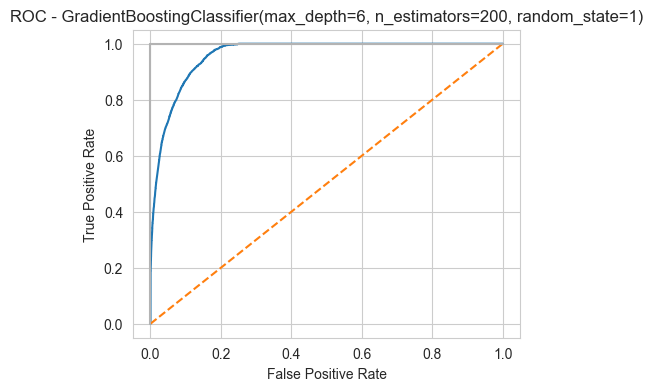

In [23]:
roc_curve_plot(gbc, x_test, y_test)

In [27]:
x1 = pd.get_dummies(x, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)

### Learning curve:

CPU times: total: 2.2 s
Wall time: 23min 29s


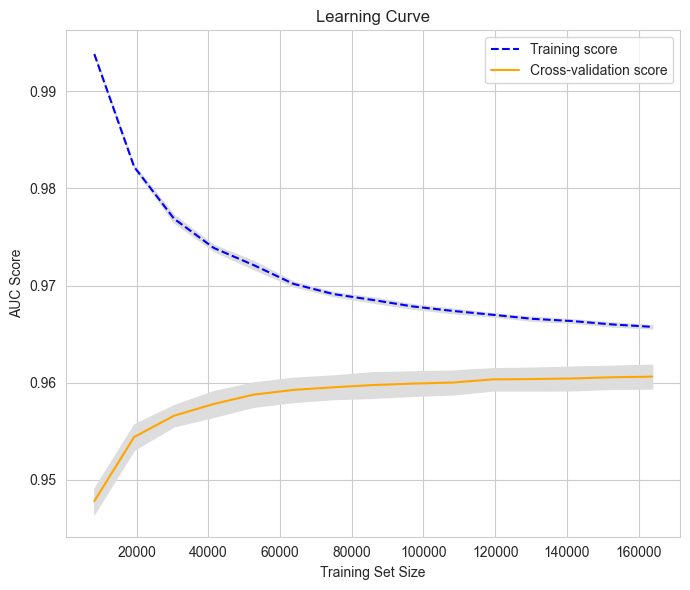

In [28]:
%time train_sizes, train_scores, test_scores = learning_curve(gbc, x_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1, train_sizes=np.linspace(0.05, 1, 15))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7, 6))
plt.plot(train_sizes, train_mean, '--',
         color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange",
         label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel(
    "AUC Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**The model accuracy steadies around 0.96 with training set size = 80000**

## Parameter Tuning
Here I'm trying to find the best parameters for gradiant boosting model

In [145]:
param_range = np.arange(10, 300, 10)

%time train_scores, test_scores = validation_curve(GradientBoostingClassifier(max_depth=5),x1, y, param_name="n_estimators", param_range=param_range,cv=4, scoring="accuracy",n_jobs=12)

CPU times: total: 1.75 s
Wall time: 25min 33s


KeyboardInterrupt: 

In [147]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

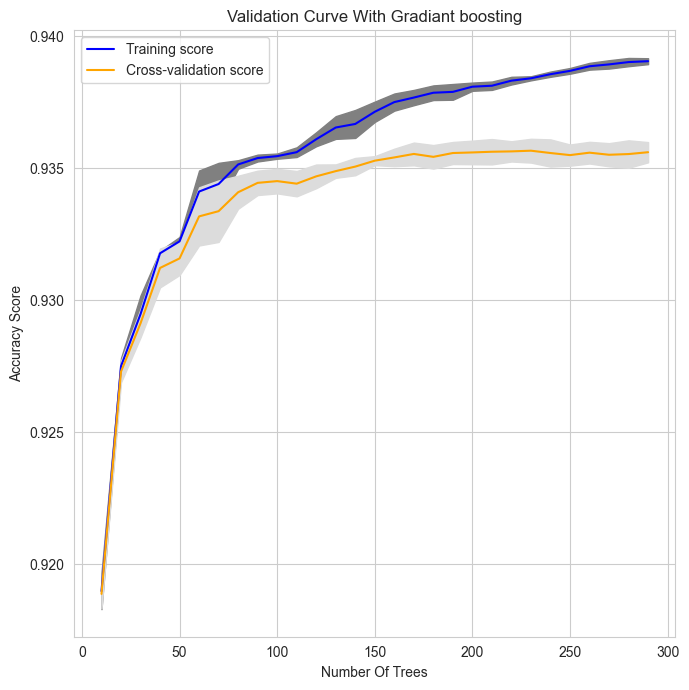

In [148]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="orange")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve With Gradiant boosting")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

We can see that the best n_estimator is 200... now we use it in our model.

## Feature importance

In [34]:
import eli5
eli5.explain_weights(gbc, feature_names=list(x_train.columns))

Weight,Feature
0.1770 ± 0.1037,shot_place_4.0
0.1675 ± 0.1146,shot_place_3.0
0.1006 ± 0.0746,location_15.0
0.0658 ± 0.1047,shot_place_5.0
0.0649 ± 0.0558,shot_place_12.0
0.0620 ± 0.0636,situation_2.0
0.0615 ± 0.0675,shot_place_13.0
0.0591 ± 0.0845,situation_3.0
0.0549 ± 0.0763,location_13.0
0.0344 ± 0.0687,location_19.0


Here it shows that only shot_place & location has the biggest influence

## Data Balance
Check for imbalance data...

In [36]:
scored = df_cleaned[df_cleaned['is_goal'] == 1]['is_goal'].sum()
all_shots = df_cleaned.shape[0]
percent = round(scored/all_shots * 100, 2)
print('The total shots of the dataset were {} . While goals were {}'.format(
    all_shots, scored))
print('And that makes {}% of the shots where goals.'.format(percent))

The total shots of the dataset were 227451 . While goals were 22770
And that makes 10.01% of the shots where goals.


In [37]:
new_train=pd.concat([df_cleaned[(df_cleaned.is_goal==0)&(df_cleaned.event_type==1)].sample(n=50000),df_cleaned[df_cleaned.is_goal==1]])

In [38]:
scored = new_train[new_train['is_goal'] == 1]['is_goal'].sum()
all_shots = new_train.shape[0]
percent = round(scored/all_shots * 100, 2)
print('The total shots of the dataset were {} . While goals were {}'.format(
    all_shots, scored))
print('And that makes {}% of the shots where goals.'.format(percent))

The total shots of the dataset were 72770 . While goals were 22770
And that makes 31.29% of the shots where goals.


now its better... lets see the result..

In [39]:
x_b = new_train[['time','location', 'bodypart', 'assist_method', 'situation','side','shot_place']]
y_b=new_train['is_goal']
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_b,y_b,test_size=0.2,random_state=1)

In [40]:
x_train_b = pd.get_dummies(x_train_b, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)
x_test_b = pd.get_dummies(x_test_b, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)


A function for quick score comparison...

In [41]:
def test_all_models(x_test,x_train,y_test,y_train):
    '''
    Takes x_test,x_train,y_test,y_train, fits and predict by :
    Logistic regression,Decision tree ,Random forest,Gradient boosting.
    :param x_test:
    :param x_train:
    :param y_test:
    :param y_train:
    :return:
    DataFrame with scores of each model
    '''
    lr=LogisticRegression(n_jobs=-1)
    dt=DecisionTreeClassifier(random_state=1)
    rf = RandomForestClassifier(n_jobs=-1, random_state=1)
    gbc = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=1)
    models=[lr,dt,rf,gbc]
    scores_comp=[]
    for i in models:
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        scores=model_scores(i,y_test,y_pred)
        scores_comp.append(scores)
    scores_df= pd.DataFrame(scores_comp).sort_values(by='AUC score',ascending=False)
    return scores_df

### Original dataset scores...

In [42]:
test_all_models(x_test, x_train, y_test, y_train)

LogisticRegression(n_jobs=-1) scores are: 
Accuracy: 0.935
AUC: 0.777
f1: 0.642
And the confusion matrix is:
 [[39924  1022]
 [ 1916  2629]]
 
LogisticRegression(n_jobs=-1) predicted 39924 True positives (actual goals) and 2629 True negatives (not goals).
And a total of 2938 False positives & negatives.
It means 93.5% of times the model predicted a shot result correctly.
------------------------------
DecisionTreeClassifier(random_state=1) scores are: 
Accuracy: 0.923
AUC: 0.739
f1: 0.568
And the confusion matrix is:
 [[39656  1290]
 [ 2228  2317]]
 
DecisionTreeClassifier(random_state=1) predicted 39656 True positives (actual goals) and 2317 True negatives (not goals).
And a total of 3518 False positives & negatives.
It means 92.3% of times the model predicted a shot result correctly.
------------------------------
RandomForestClassifier(n_jobs=-1, random_state=1) scores are: 
Accuracy: 0.924
AUC: 0.758
f1: 0.591
And the confusion matrix is:
 [[39532  1414]
 [ 2043  2502]]
 
RandomFor

,Model,Accuracy,f1 score,AUC score
3,"GradientBoostingClassifier(max_depth=5, n_esti...",93.67,0.651,0.783
0,LogisticRegression(n_jobs=-1),93.54,0.642,0.777
2,"RandomForestClassifier(n_jobs=-1, random_state=1)",92.40,0.591,0.758
1,DecisionTreeClassifier(random_state=1),92.27,0.568,0.739


### Balanced dataset scores...

In [43]:
test_all_models(x_test_b, x_train_b, y_test_b, y_train_b)

LogisticRegression(n_jobs=-1) scores are: 
Accuracy: 0.885
AUC: 0.874
f1: 0.82
And the confusion matrix is:
 [[9054  976]
 [ 700 3824]]
 
LogisticRegression(n_jobs=-1) predicted 9054 True positives (actual goals) and 3824 True negatives (not goals).
And a total of 1676 False positives & negatives.
It means 88.5% of times the model predicted a shot result correctly.
------------------------------
DecisionTreeClassifier(random_state=1) scores are: 
Accuracy: 0.857
AUC: 0.828
f1: 0.765
And the confusion matrix is:
 [[9072  958]
 [1128 3396]]
 
DecisionTreeClassifier(random_state=1) predicted 9072 True positives (actual goals) and 3396 True negatives (not goals).
And a total of 2086 False positives & negatives.
It means 85.7% of times the model predicted a shot result correctly.
------------------------------
RandomForestClassifier(n_jobs=-1, random_state=1) scores are: 
Accuracy: 0.865
AUC: 0.846
f1: 0.785
And the confusion matrix is:
 [[8993 1037]
 [ 930 3594]]
 
RandomForestClassifier(n

,Model,Accuracy,f1 score,AUC score
3,"GradientBoostingClassifier(max_depth=5, n_esti...",88.97,0.827,0.879
0,LogisticRegression(n_jobs=-1),88.48,0.820,0.874
2,"RandomForestClassifier(n_jobs=-1, random_state=1)",86.48,0.785,0.846
1,DecisionTreeClassifier(random_state=1),85.67,0.765,0.828


So the more Balanced dataset resulted a higher accuracy..
**0.877 AUC score** is quite good improvement...
Lets evaluate more ...

## Balanced data evaluation
### ROC curve

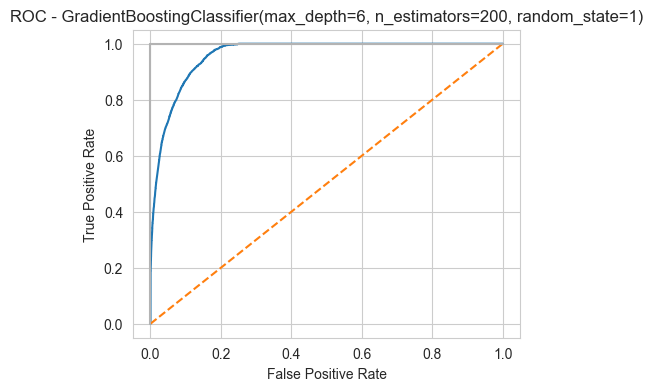

In [44]:
roc_curve_plot(gbc, x_test, y_test)

### Learning curve

CPU times: total: 1.83 s
Wall time: 3min 49s


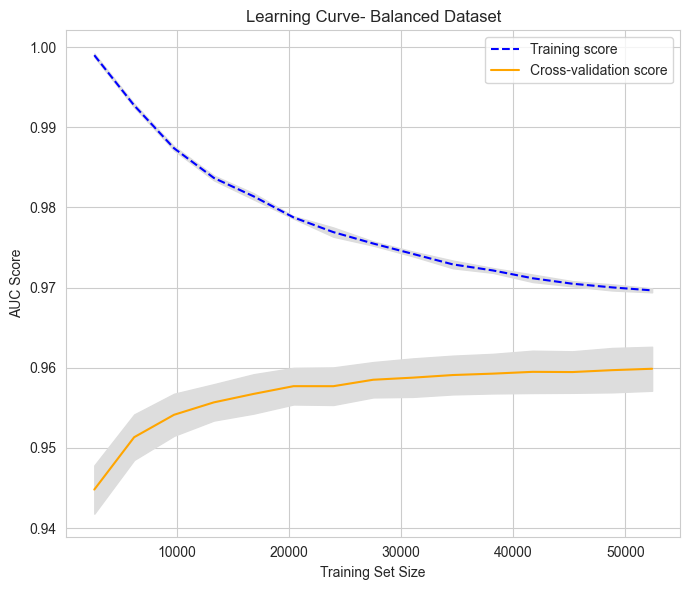

In [45]:
%time train_sizes, train_scores, test_scores = learning_curve(gbc, x_train_b, y_train_b, cv=10, scoring='roc_auc', n_jobs=-1, train_sizes=np.linspace(0.05, 1, 15))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7, 6))
plt.plot(train_sizes, train_mean, '--',
         color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange",
         label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve- Balanced Dataset")
plt.xlabel("Training Set Size"), plt.ylabel(
    "AUC Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Conclusions:

Next i will try to encode 'player' column by ordinal encoding..the highest goalscorer gets high weight , thus more accurate goal prediction
Also